# Setup

In [1]:
# General libraries 
from datetime import date
from datetime import *
import pandas as pd
import numpy as np
import warnings
import logging
import mlflow
import sys
import os

# Plots
from matplotlib.offsetbox import TextArea, AnnotationBbox
import matplotlib.pyplot as plt
import networkx as nx

# LP
import pulp

/Users/ignasipascual/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Directory

In [2]:
# Get the current working directory
script_dir = os.getcwd()

# Check if we are inside the "notebooks" folder and move one level up
if "notebooks" in script_dir:
    parent_dir = os.path.dirname(script_dir)
    os.chdir(parent_dir)

# Verify the change
cwd = os.getcwd()
print("Current Working Directory:", cwd)

Current Working Directory: /Users/ignasipascual/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/Optimizer


# Assets

In [3]:
# Load assets
from utils.optimizer import Optimizer
from utils.plotter import Plotter

# Parameters

In [4]:
# Set random seed
np.random.seed(42)

# Safety stock
service_level=0.95
method='z_score'

# Load data

In [5]:
# Write csv
simulated_data = pd.read_csv('data/simulated_data.csv')

# Show
simulated_data.head()

,plant,warehouse,market,product,week,supply,sell_in,inventory,lead_time
0,plant_1,warehouse_1,market_1,product_1,202501,144.0,104.0,240,8
1,plant_1,warehouse_1,market_1,product_1,202502,57.0,165.0,132,8
2,plant_1,warehouse_1,market_1,product_1,202503,90.0,126.0,96,8
3,plant_1,warehouse_1,market_1,product_1,202504,110.0,138.0,68,8
4,plant_1,warehouse_1,market_1,product_1,202505,177.0,126.0,119,8


# Start optimizer

In [6]:
# Initialize optimizator
opt = Optimizer(simulated_data)

# Show
opt

## Safety stock

In [7]:
# Calculate safety stock
sim_data_policy = opt.create_safety_stock(service_level, method)

# Show
sim_data_policy.head()

,plant,warehouse,market,product,week,supply,sell_in,inventory,lead_time,std_sell_in,mean_sell_in,safety_stock
0,plant_1,warehouse_1,market_1,product_1,202501,144.0,104.0,240,8,39.144178,142.4,64.39
1,plant_1,warehouse_1,market_1,product_1,202502,57.0,165.0,132,8,39.144178,142.4,64.39
2,plant_1,warehouse_1,market_1,product_1,202503,90.0,126.0,96,8,39.144178,142.4,64.39
3,plant_1,warehouse_1,market_1,product_1,202504,110.0,138.0,68,8,39.144178,142.4,64.39
4,plant_1,warehouse_1,market_1,product_1,202505,177.0,126.0,119,8,39.144178,142.4,64.39


# Plot network

In [8]:
# Initialize the plotter
plotter = Plotter(sim_data_policy)

# Show
plotter

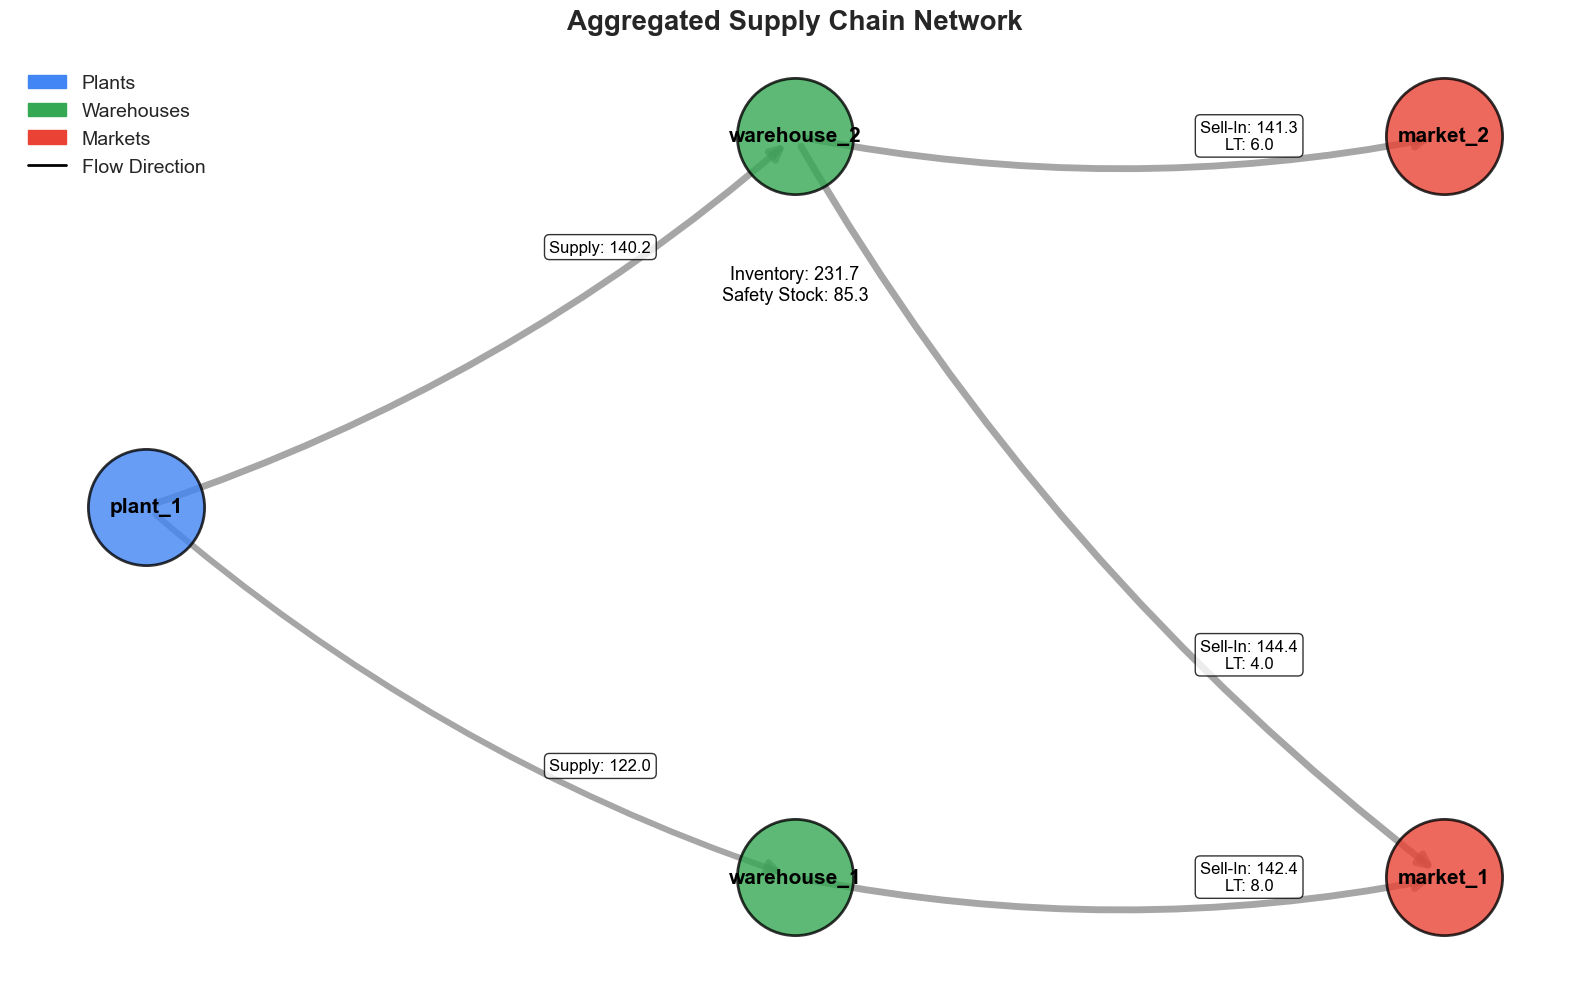

In [9]:
# Plot the network
plotter.plot_multiple_networks()